In [1]:
import pandas as pd
from matplotlib.patches import Rectangle
import utils
import numpy as np

In [2]:
#----------------------------------------------------------------------------------------
#
#
# 1. Gaze Data import and computation of X and Y gaze coordinates
#
#
#----------------------------------------------------------------------------------------

In [3]:
#Read gaze data using pandas library
data = pd.read_csv('raw-data/gazeData.csv', skiprows=23)
# set display.max_columns to none, to show all the columns when using head()
pd.set_option('display.max_columns', None)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (8,9,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# preview gaze data
# Note: see raw-data/gazeData.csv for columns meta-data (under Section #METADATA)
data.head()

,Row,Respondent,Age,Gender,Group,Calibration,Timestamp,EventSource,SlideEvent,StimType,Duration,CollectionPhase,SourceStimuliName,EventSource.1,ET_GazeLeftx,ET_GazeLefty,ET_GazeRightx,ET_GazeRighty,ET_PupilLeft,ET_PupilRight,ET_TimeSignal,ET_DistanceLeft,ET_DistanceRight,ET_CameraLeftX,ET_CameraLeftY,ET_CameraRightX,ET_CameraRightY,ET_ValidityLeft,ET_ValidityRight
0,1,P01,0,OTHER,Default,Excellent,122.0544,1.0,StartSlide,TestImage,900000.0,StimuliDisplay,img,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,P01,0,OTHER,Default,Excellent,128.9448,NaN,NaN,NaN,NaN,NaN,img,1.0,951.0,486.0,970.0,503.0,-1.000000,-1.0,141.658,566.252441,569.685181,0.598863,0.525673,0.429841,0.519144,0.0,0.0
2,3,P01,0,OTHER,Default,Excellent,132.9790,1.0,StartMedia,TestImage,900000.0,StimuliDisplay,img,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,P01,0,OTHER,Default,Excellent,137.2724,NaN,NaN,NaN,NaN,NaN,img,1.0,938.0,500.0,966.0,519.0,-1.000000,-1.0,149.984,566.216125,569.593445,0.599070,0.525453,0.429996,0.518994,0.0,0.0
4,5,P01,0,OTHER,Default,Excellent,145.6203,NaN,NaN,NaN,NaN,NaN,img,1.0,938.0,500.0,-1.0,-1.0,2.614349,-1.0,158.333,566.265381,-1.000000,0.599004,0.525297,-1.000000,-1.000000,0.0,4.0


In [5]:
# Replace -1 values with NaN
data = data.replace(-1,np.nan)

# compute the mean X and Y gaze positions based on the left and right eyes
data['GazeX'] = data[['ET_GazeLeftx','ET_GazeRightx']].mean(axis=1)
data['GazeY'] = data[['ET_GazeLefty','ET_GazeRighty']].mean(axis=1)

In [6]:
# preview gaze data with mean X and Y gaze positions columns
data.head()

,Row,Respondent,Age,Gender,Group,Calibration,Timestamp,EventSource,SlideEvent,StimType,Duration,CollectionPhase,SourceStimuliName,EventSource.1,ET_GazeLeftx,ET_GazeLefty,ET_GazeRightx,ET_GazeRighty,ET_PupilLeft,ET_PupilRight,ET_TimeSignal,ET_DistanceLeft,ET_DistanceRight,ET_CameraLeftX,ET_CameraLeftY,ET_CameraRightX,ET_CameraRightY,ET_ValidityLeft,ET_ValidityRight,GazeX,GazeY
0,1,P01,0,OTHER,Default,Excellent,122.0544,1.0,StartSlide,TestImage,900000.0,StimuliDisplay,img,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,P01,0,OTHER,Default,Excellent,128.9448,NaN,NaN,NaN,NaN,NaN,img,1.0,951.0,486.0,970.0,503.0,NaN,NaN,141.658,566.252441,569.685181,0.598863,0.525673,0.429841,0.519144,0.0,0.0,960.5,494.5
2,3,P01,0,OTHER,Default,Excellent,132.9790,1.0,StartMedia,TestImage,900000.0,StimuliDisplay,img,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,P01,0,OTHER,Default,Excellent,137.2724,NaN,NaN,NaN,NaN,NaN,img,1.0,938.0,500.0,966.0,519.0,NaN,NaN,149.984,566.216125,569.593445,0.599070,0.525453,0.429996,0.518994,0.0,0.0,952.0,509.5
4,5,P01,0,OTHER,Default,Excellent,145.6203,NaN,NaN,NaN,NaN,NaN,img,1.0,938.0,500.0,NaN,NaN,2.614349,NaN,158.333,566.265381,NaN,0.599004,0.525297,NaN,NaN,0.0,4.0,938.0,500.0


In [7]:
#----------------------------------------------------------------------------------------
#
#
# 2. Data exploration and visual quality assessment
# Projecting gaze points on Areas of Interests (AOIs)
# 
#
#----------------------------------------------------------------------------------------

In [8]:
# Read iMotions file with AOI coordinates
""" Dataframe columns
AOI: name of the AOI
p1x: starting point of the AOI rectangle on the x axis
p1y: starting point of the AOI rectangle on the y axis
p2x: ending point of the AOI rectangle on the x axis
p2y: ending point of the AOI rectangle on the y axis
"""
aois = pd.read_csv("raw-data/aoisDefinition.csv")

In [9]:
# Compute the width and the height of the AOIs based on their start/ending points
aois['width'] = aois['p2x']-aois['p1x']
aois['height'] = aois['p2y']-aois['p1y']

In [10]:
# Display the user defined areas of interest
display(aois)

,AOI,p1x,p1y,p2x,p2y,width,height
0,Paragraph1,86.153846,170.769231,548.923077,365.230769,462.769231,194.461538
1,Paragraph2,569.846154,169.538462,1028.923077,370.153846,459.076923,200.615385
2,Paragraph3,80.000000,396.000000,551.384615,546.153846,471.384615,150.153846
3,Paragraph4,572.307692,394.769231,1031.384615,549.846154,459.076923,155.076923
4,Paragraph5,78.769231,570.769231,553.846154,775.076923,475.076923,204.307692
5,Paragraph6,97.230769,799.692308,1011.692308,975.692308,914.461539,176.000000
6,Text_Area,68.923077,169.538462,1033.846154,1000.307692,964.923077,830.769230
7,SubFigure1,1101.538462,383.692308,1352.615385,819.384615,251.076923,435.692308
8,SubFigure2,1358.769231,382.461539,1591.384615,829.230769,232.615384,446.769231
9,SubFigure3,1602.461538,380.000000,1849.846154,832.923077,247.384616,452.923077


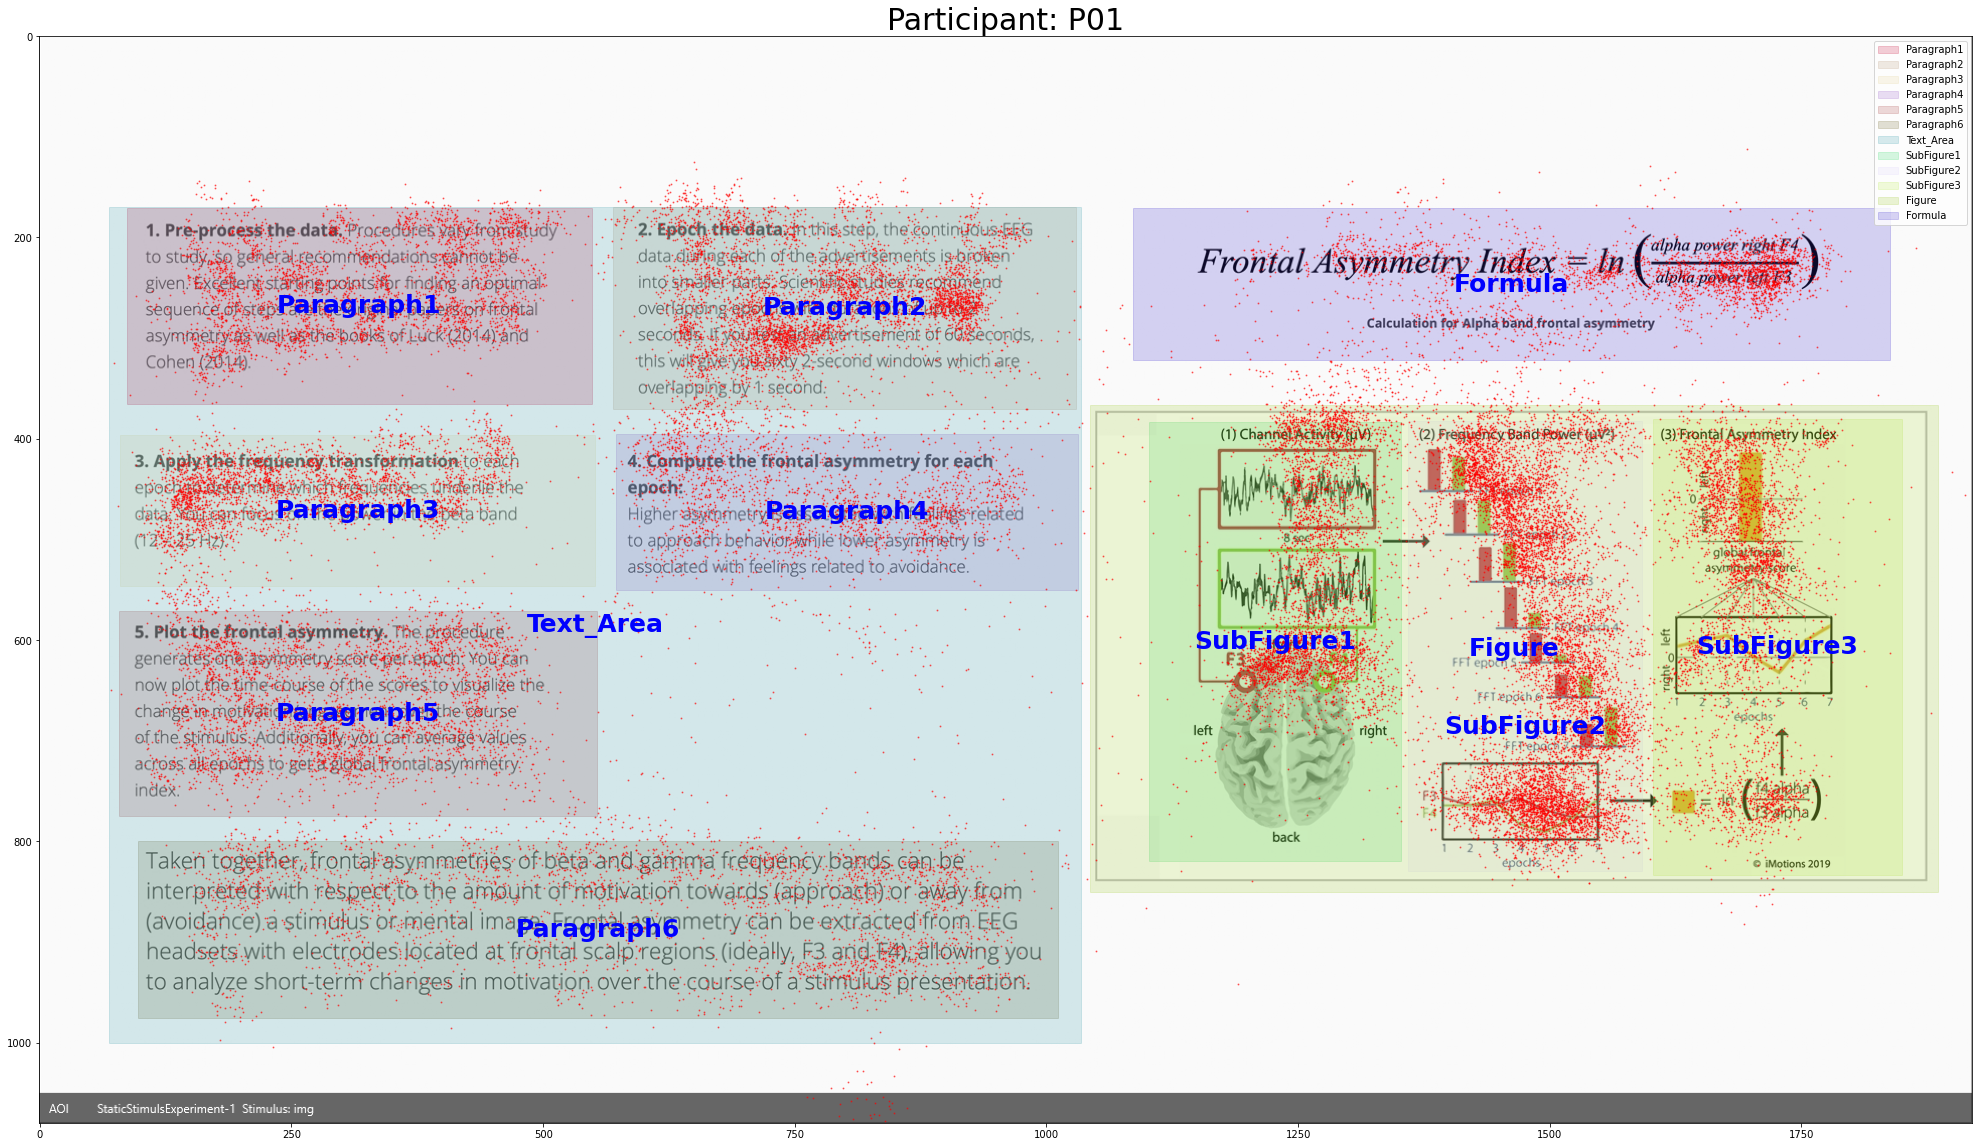

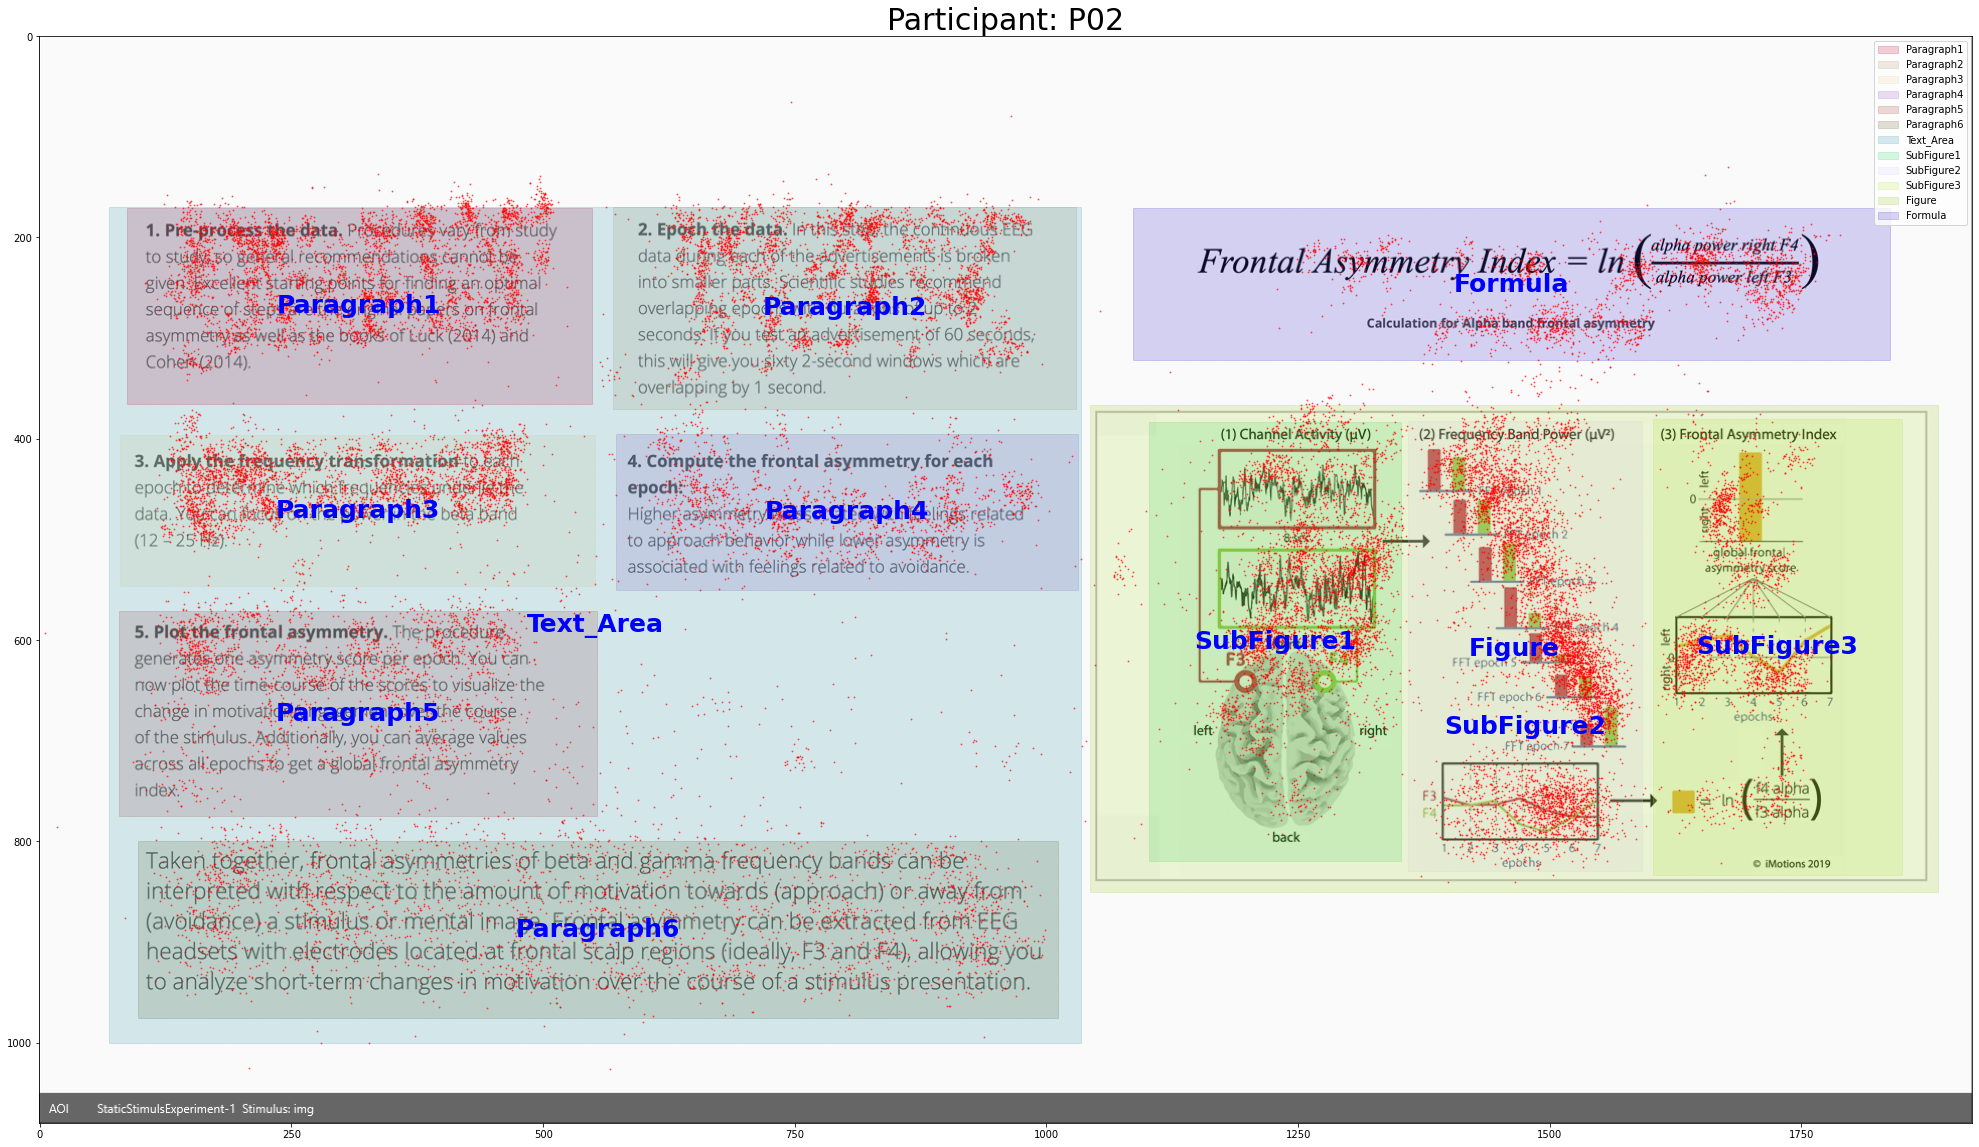

In [11]:
# calculate the initial position of the annotations (i.e., a text with AOI name to show in the plots, see below)
aois[['annotationX','annotationY']] = aois.apply(lambda x: utils.calculateInitialAnnotationPosition(aois,x.name), axis=1)

# Generate a list of random colors (to be assigned to the different AOIs). **The number of random colors should higher or equal to the number of your AOIs** 
colors = utils.generateRandomColors(20)


# Iteratate over the participants and plot gazes and AOIs for each participant
for participant in data['Respondent'].unique():
    
    # filter in the participant data
    participantData= data[data['Respondent']==participant]

    # Initiate a coordinate system with a background image
    fig, ax = utils.initPlotContainer('raw-data/stimulus.png')
    
    # set title
    ax.set_title(f'Participant: {participant}', fontsize=30)

    # Plot gazes
    ax.plot(participantData['GazeX'], participantData['GazeY'],'o',alpha=0.5, markersize=1, color='red')

    # plot AOIs
    # Iterate over the rows in aois dataframe
    for index, row in aois.iterrows():
        # Plot each AOI as a rectangle
        ax.add_patch(Rectangle((row['p1x'], row['p1y']), row['width'], row['height'],color=colors[index],alpha=0.2,  label=row["AOI"]))
        # Add annotation
        ax.annotate(row['AOI'], utils.avoidAnnotationOverlap(row['annotationX'],row['annotationY'],index,aois), color='blue', weight='bold', fontsize=25, ha='center', va='center')
    # legend
    ax.legend(loc='upper right')

In [12]:
#----------------------------------------------------------------------------------------
#
#
# 3. Assign gaze points to AOIs
#
#
#----------------------------------------------------------------------------------------

In [13]:
# copy gazeData to gazeDataWithAOIs
gazeDataWithAOIs = data.copy(deep=True)

# iterate over the rows in aois dataframe
for index, row in aois.iterrows():
    # get the name of AOI
    aoiName = row['AOI']
    # add a new column with key=aoiName and value=(0 or 1) depending on whether the gaze point in within the AOI in question 
    gazeDataWithAOIs[aoiName] = data.apply(lambda x : utils.pointInRect(x['GazeX'],x['GazeY'],row['p1x'],row['p1y'],row['p2x'],row['p2y']),axis=1)

In [14]:
# preview gaze data with AOIs mapping
gazeDataWithAOIs.head()

,Row,Respondent,Age,Gender,Group,Calibration,Timestamp,EventSource,SlideEvent,StimType,Duration,CollectionPhase,SourceStimuliName,EventSource.1,ET_GazeLeftx,ET_GazeLefty,ET_GazeRightx,ET_GazeRighty,ET_PupilLeft,ET_PupilRight,ET_TimeSignal,ET_DistanceLeft,ET_DistanceRight,ET_CameraLeftX,ET_CameraLeftY,ET_CameraRightX,ET_CameraRightY,ET_ValidityLeft,ET_ValidityRight,GazeX,GazeY,Paragraph1,Paragraph2,Paragraph3,Paragraph4,Paragraph5,Paragraph6,Text_Area,SubFigure1,SubFigure2,SubFigure3,Figure,Formula
0,1,P01,0,OTHER,Default,Excellent,122.0544,1.0,StartSlide,TestImage,900000.0,StimuliDisplay,img,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
1,2,P01,0,OTHER,Default,Excellent,128.9448,NaN,NaN,NaN,NaN,NaN,img,1.0,951.0,486.0,970.0,503.0,NaN,NaN,141.658,566.252441,569.685181,0.598863,0.525673,0.429841,0.519144,0.0,0.0,960.5,494.5,0,0,0,1,0,0,1,0,0,0,0,0
2,3,P01,0,OTHER,Default,Excellent,132.9790,1.0,StartMedia,TestImage,900000.0,StimuliDisplay,img,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
3,4,P01,0,OTHER,Default,Excellent,137.2724,NaN,NaN,NaN,NaN,NaN,img,1.0,938.0,500.0,966.0,519.0,NaN,NaN,149.984,566.216125,569.593445,0.599070,0.525453,0.429996,0.518994,0.0,0.0,952.0,509.5,0,0,0,1,0,0,1,0,0,0,0,0
4,5,P01,0,OTHER,Default,Excellent,145.6203,NaN,NaN,NaN,NaN,NaN,img,1.0,938.0,500.0,NaN,NaN,2.614349,NaN,158.333,566.265381,NaN,0.599004,0.525297,NaN,NaN,0.0,4.0,938.0,500.0,0,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
# export gazeDataWithAOIs as csv
gazeDataWithAOIs.to_csv('data/gazeDataWithAOIs.csv',  index=False)